In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib import pyplot as mp
from scipy.stats import norm



# Confidence from Data

**What did you measure?  What does it mean?  Here we will discuss using statistics to turn data into conclusions.**

Anyone wants to be able to draw conclusions from data and that requires some statement about the probabilities associated with a given dataset.  Here are some examples:


*   You have a diagonstic test and you want to be able to determine if an individual should be treated for a given condition.
*   You have a dataset that seems to suggest you have found new physics beyond the standard model.  You'd like to know if you can claim a discovery (and the associated Nobel prize) or if you should hold off until you have more data.
*   You are turning on a new particle collider and there are concerns that it would end the earth [Will relativistic heavy-ion colliders destroy our planet?](https://arxiv.org/abs/hep-ph/9910471); [Review of Speculative "Disaster Scenarios" at RHIC](https://arxiv.org/abs/hep-ph/9910333); [disaster scenarios at the LHC](https://www.home.cern/science/accelerators/large-hadron-collider/safety-lhc)
*   What are the chances that the Trinity Atomic bomb test would ignite the atmosphere? [Washington Post summary](https://www.washingtonpost.com/science/2023/07/22/oppenheimer-manhattan-project-history-atomic-bomb-test/)

The last two are not generally quantitative probability statements, but I put them here to highlight the range of complication and importance in interpreting data.  In all of these cases though, the probabilistic data is turned into an action: treatment of the condition, a claim of discovery, turning on the accelerator.



# Confidence Limits

In week 6, we discussed the Gaussian probability distribution ([slides](https://docs.google.com/presentation/d/1PTfD9Ds2XGWao6XB387rg11-17sX0dYQvWWLYs78lFo/edit?usp=sharing)).  There we looked at for a known probability distribution, what are the probabilities of having measurements at a given value.  

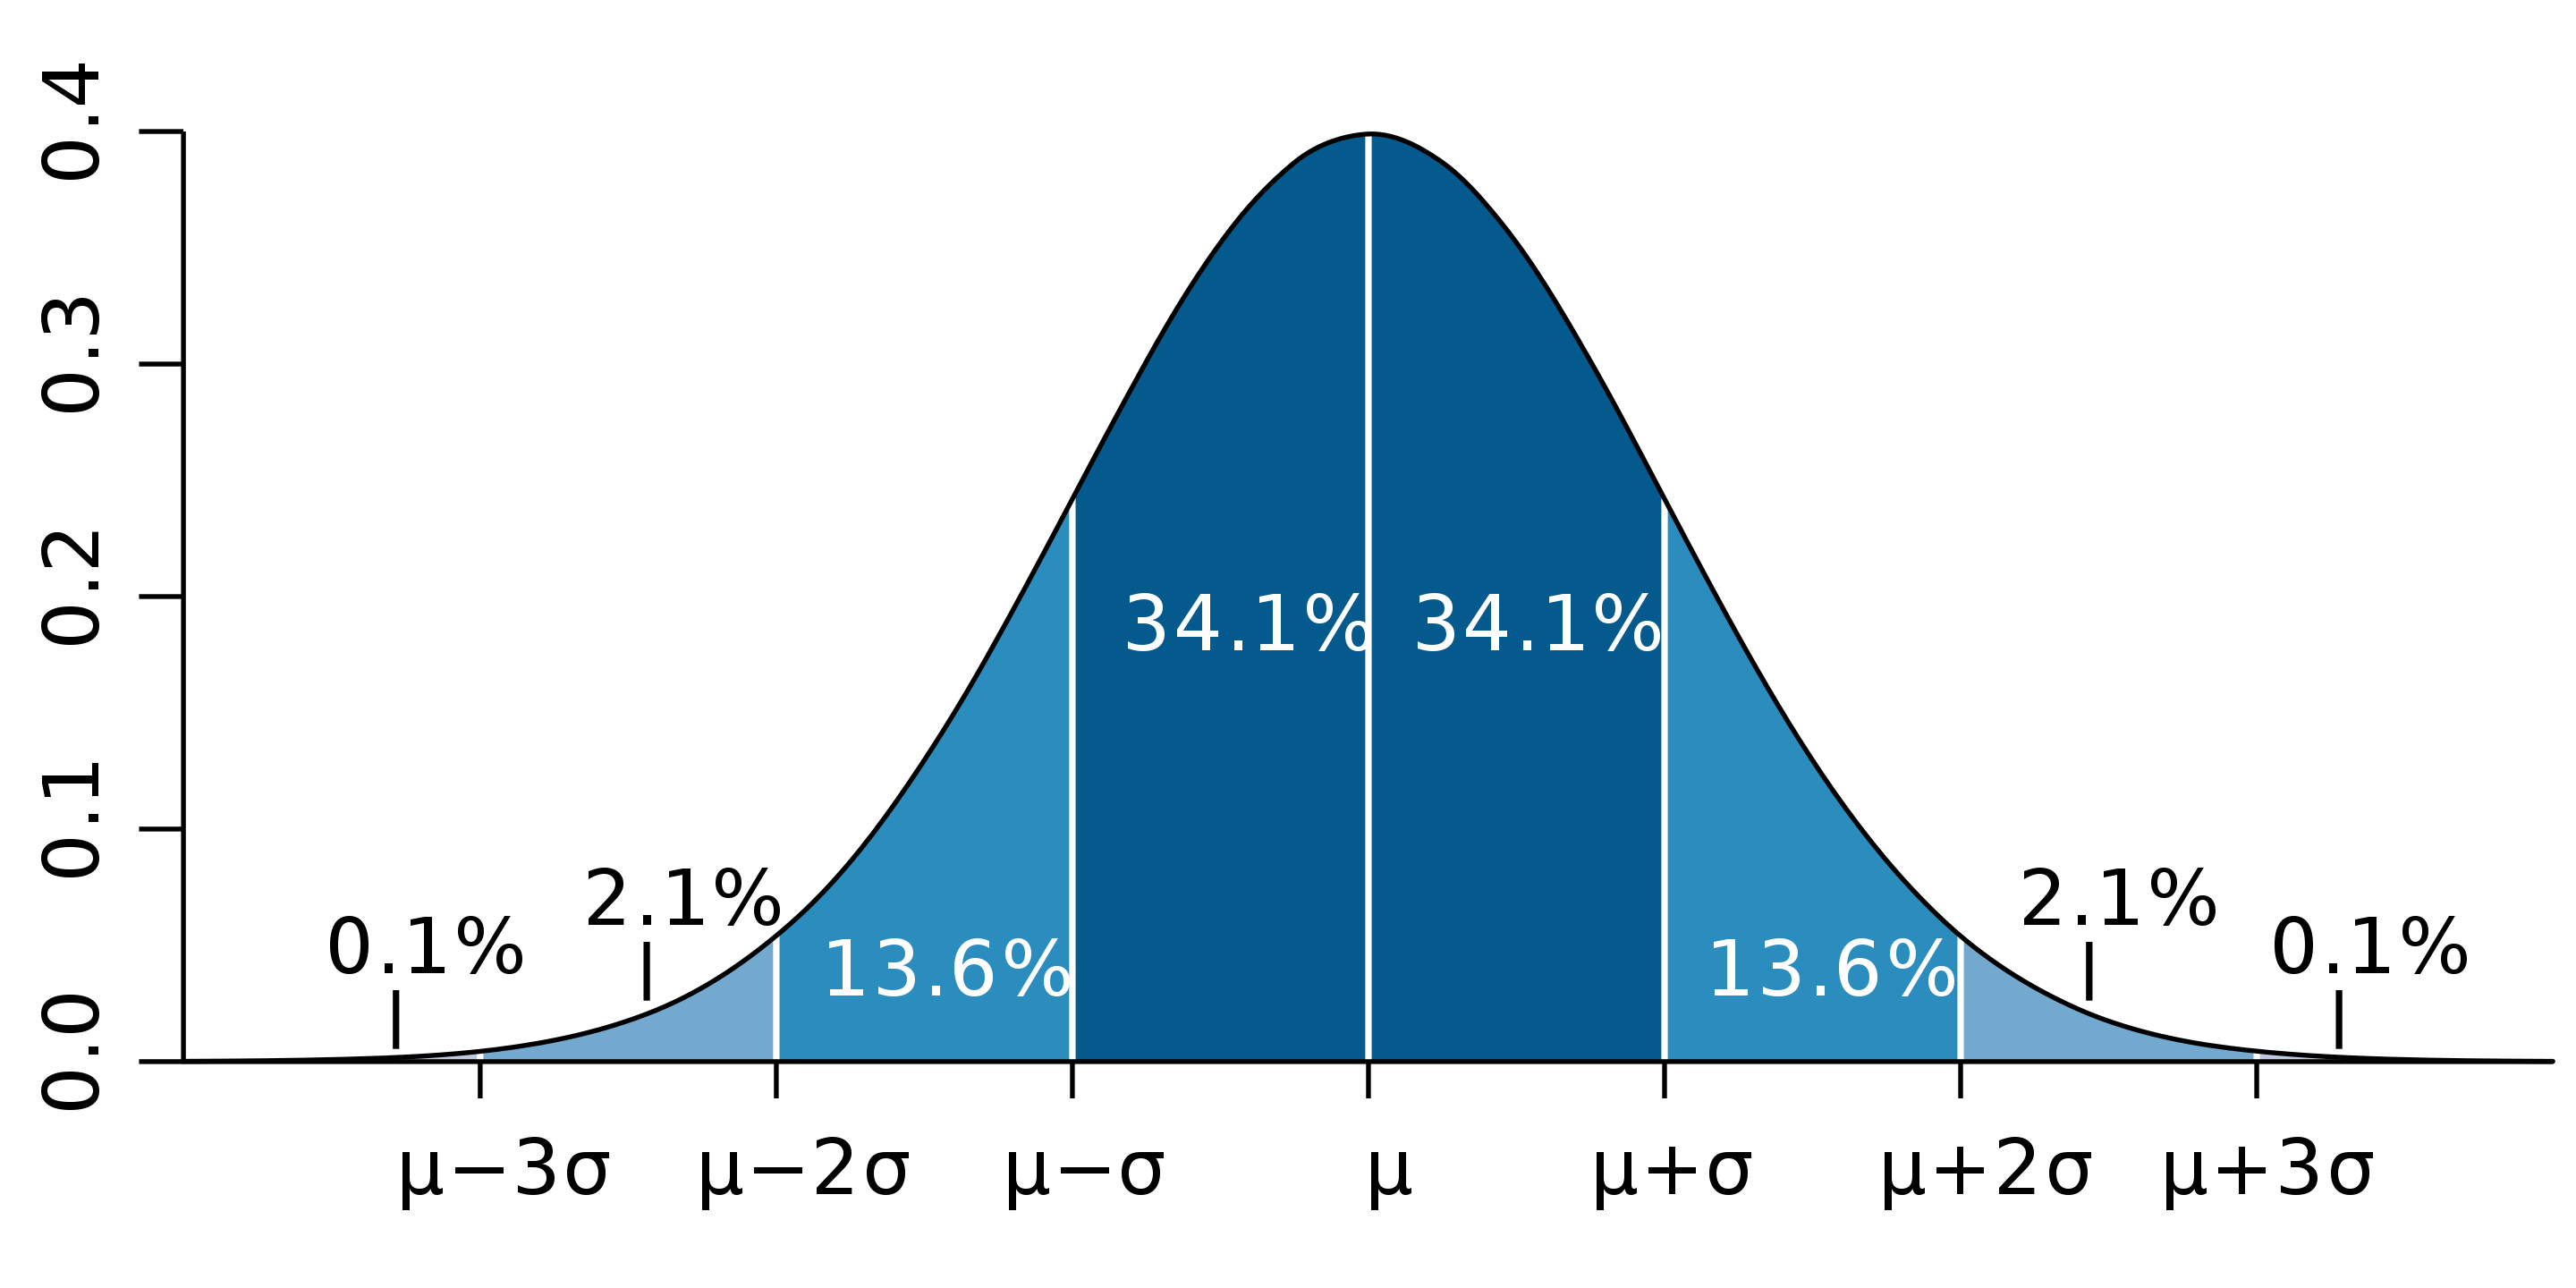




Here we disccus the more general casse  moving away from the Gaussian assumption.  Let's suppose you have an estimator of the quantity of interest, $\hat{\theta}(x_1, x_2, ..., x_n)$
based on $n$ measurements.  Additionally, let's say that you don't know the true value $\theta$ but for a given value of $\theta$ you know what the pdf of $\hat{\theta}$ would be, $g(\hat{\theta};\theta)$.
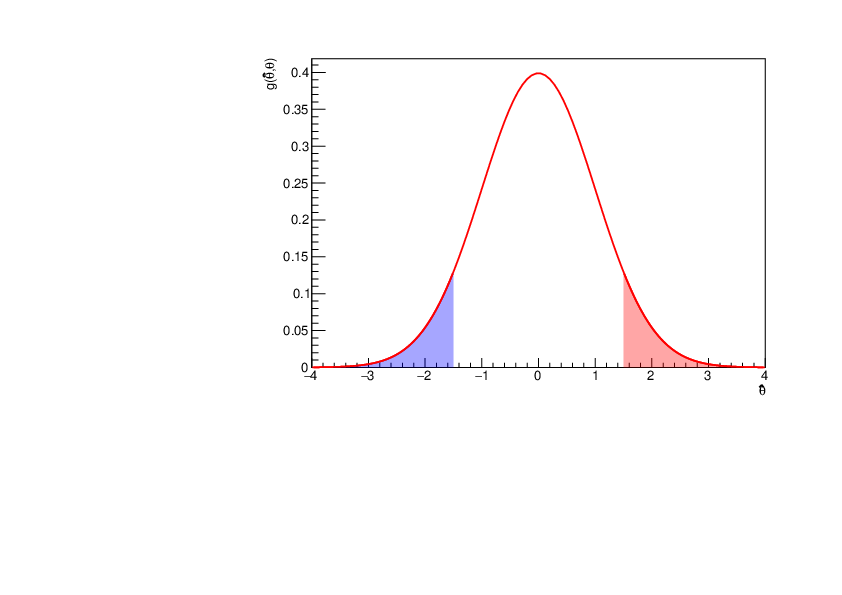

(the following discussion follows Cowan Chap. 9).

Now we can talk about the probabilities:
$$\alpha = P(\hat{\theta} ≥ u_{\alpha}(\theta))= \int_{u_{\alpha}(\theta)}^{\infty} g(\hat{\theta};\theta)d\hat{\theta}$$
In words $\alpha$ is the probability to observe $\hat{\theta} > u_{\alpha}$
on the other side of the probability distribution, we can define
$$\beta = P(\hat{\theta} ≤ u_{\beta}(\theta))= \int_{-\infty}^{u_{\alpha}(\theta)} g(\hat{\theta};\theta)d\hat{\theta}$$

These are both functions of $\hat{\theta}$ (which is known because it was measured) and $\theta$ which is not known and what you actually want to know.

What we've shown is that:
$$P(v_{\beta}(\theta) \le \hat{\theta} \le u_{\alpha}(\theta)) = 1 - \alpha - \beta$$  But what if we can come up with *inverse* functions such that $\hat{\theta} \ge u_{\alpha}(\theta)$ implies $a(\hat{\theta}) \ge \theta$ and likewise that $\hat{\theta} \le v_{\beta}(\theta)$ implies $b(\hat{\theta}) \le \theta$.  This is a reasonable assumption, assuming there is nothing too weird going on.
You could think of the 2D distribution of the pdfs for $\hat{\theta}$ given the range of true $\theta$s expected:

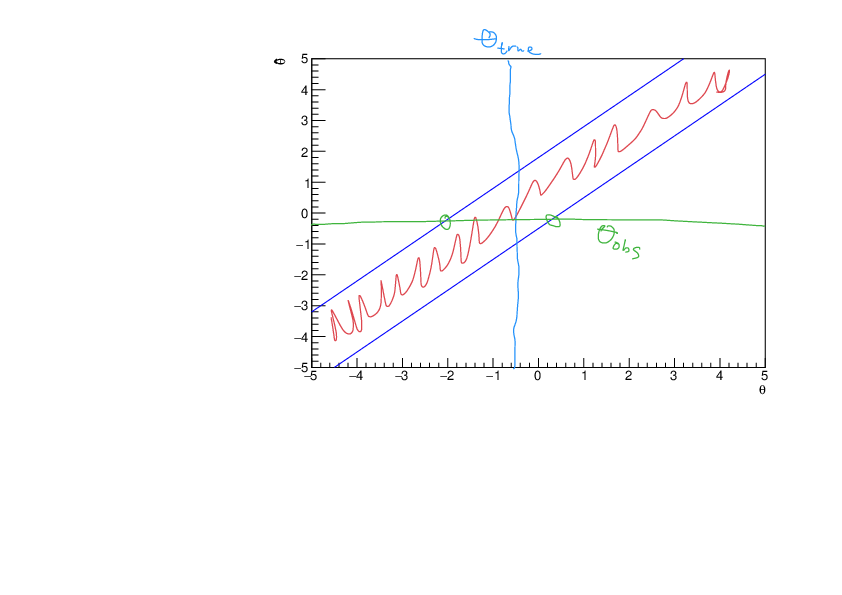

 Now, we can write:
$$P(a(\hat{\theta}) \le \theta \le b(\hat{\theta})) = 1 - \alpha - \beta$$
and now we have constraints on $\theta$ expressed in terms of $\hat{\theta}$ which we know.  fantastic!



**Types Confidience Intervals**

In the situation where $\alpha$ and $\beta$ are the same, we have defined a *central confidence interval*.  

Here is a *central interval* where 6.7% is contained outside the central region on each side.  The central interval then contains 1 - 0.067*2  probability, about 87%.  This is a symmetric distribution (it's a Gaussian) so the probabilty and the size of the regions on both sides are the same.


In the situation where $\alpha$ is zero, we have defined a lower limit.  This limit is at the $1-\beta$ confidence level.  Similarily we can define an upper limit in the case where $\beta$ is zero.  Again, this is at the $1-\alpha$ confidence level.

These limits can be defined for any situation where we have the pdf.  In the case that the underlying pdf is Gaussian, we get the results you would expect from what we discussed previously.


A real example is the 2011 Higgs results from the LHC.  In 2011 ATLAS and CMS did analyses showing the results from a Higgs boson search with the existing data.  The ATLAS result is [here](https://atlas.cern/updates/press-statement/atlas-experiment-presents-latest-higgs-search-status).  The 95% CL are shown as a function of the Higgs mass, which was unknown at the time.   The y-axis shows the value of the constraint in terms of the ratio of the observed cross section ($\sigma$) to that expected from the Standard Model ($\sigma_{SM}$). The "expected" curve shows how constraining the data would be expected to be in the absence of a Higgs boson.   You can see that at the lower masses the constraints are not strong, but the expected constraints get much stronger toward higher masses.  The "observed" curves show was was actually seen.  There the constraints are unexpectedly weaker in the range from 115-130 GeV masses.  Weaker constraints translate into "an intriguing excess of events" (Fabiola Gianotti).  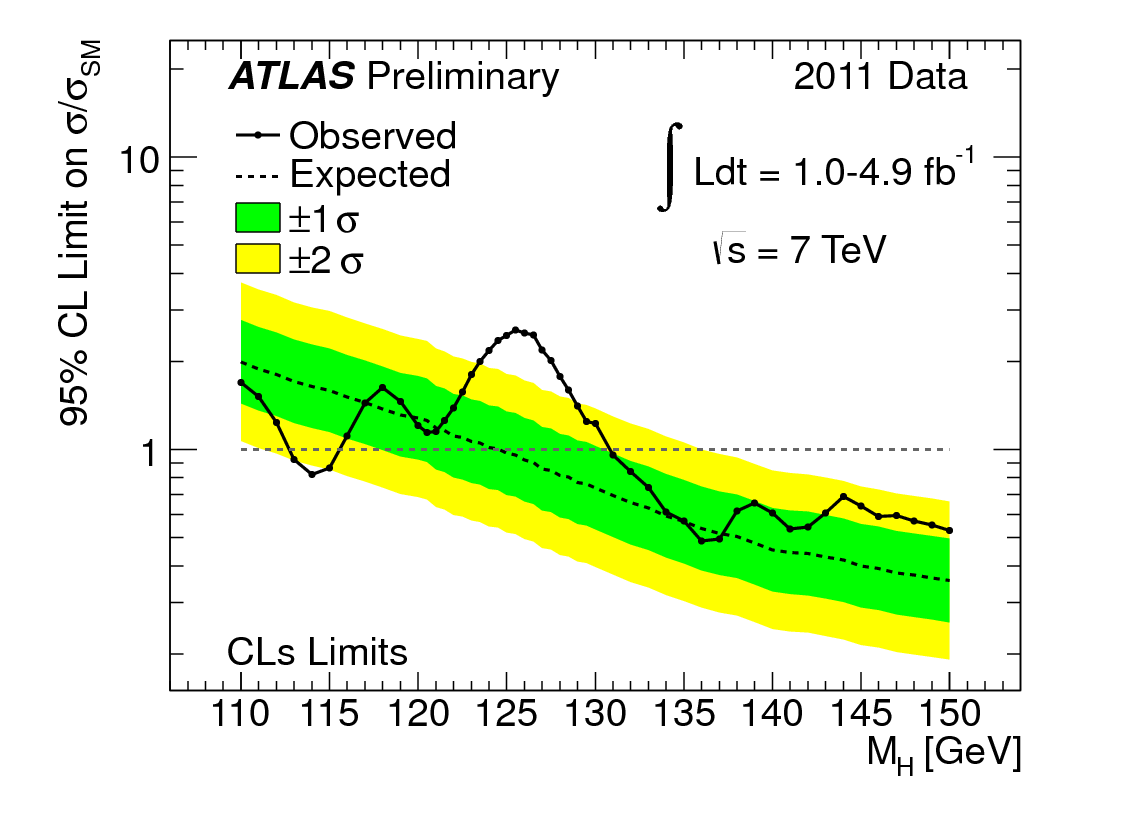

Indeed, with more data, the Higgs was observed that summer [paper](https://arxiv.org/pdf/1207.7214.pdf).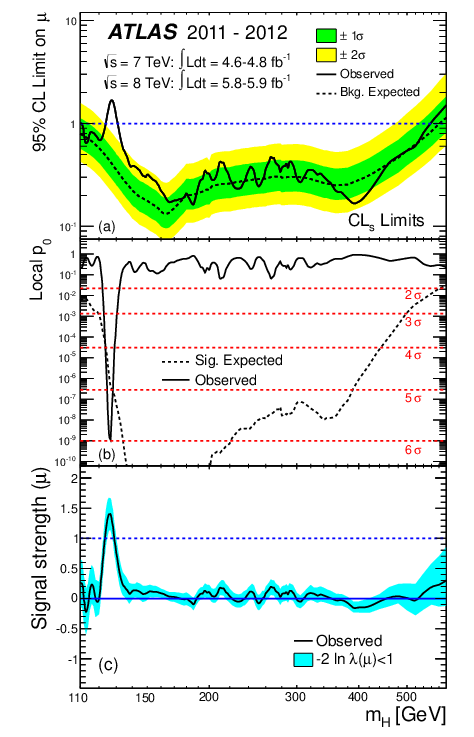

**Limits Near Unphysical Boundaries**
What if you have measured something close to zero that can't be negatve? Think about a yield of particles, a mass or a decay rate.  Physics requires that these values be non-negative, however, depending on how your experiment is setup you can completely measure a central value that it is in the unphysical region.  

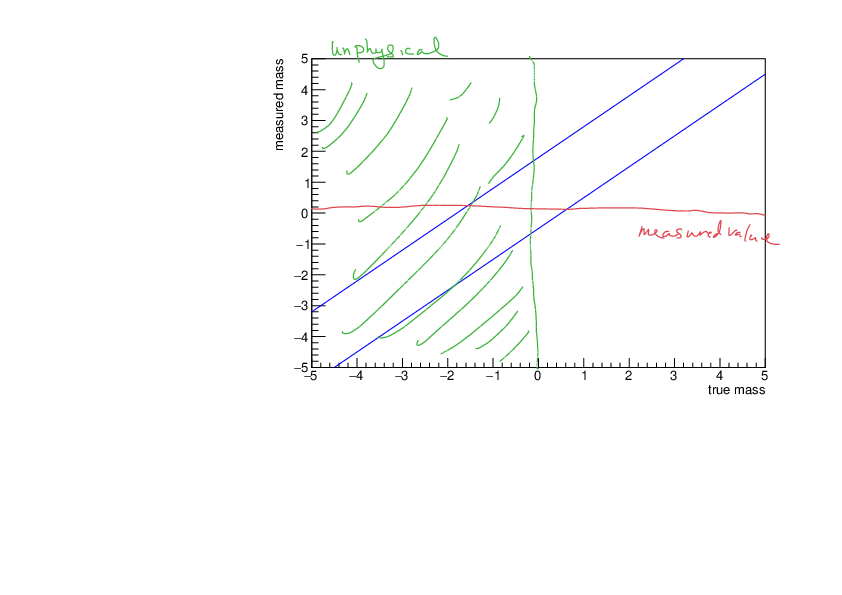

 Moreover, you could measure a value so low, it is entirely within the physically unallowed region:

 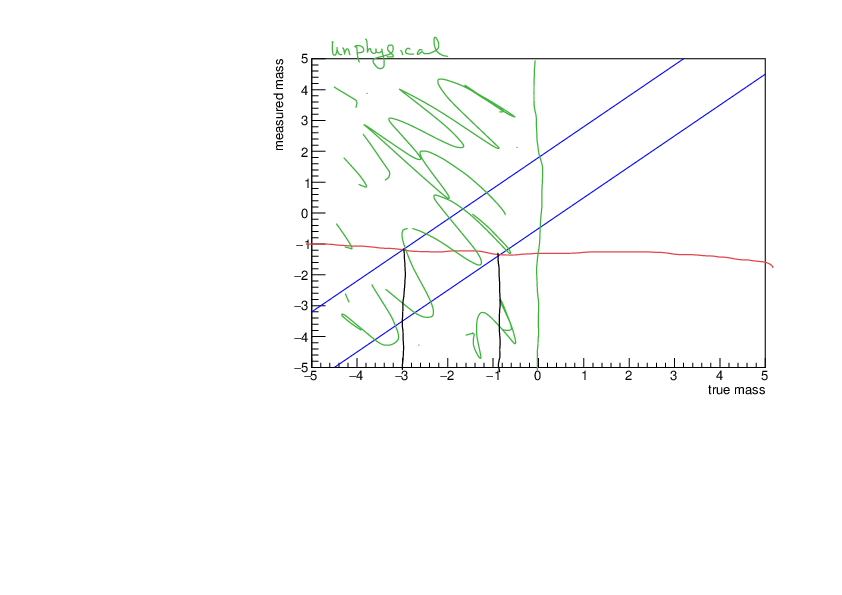

 What does this mean?  There is an empty set which is the union of this confidence level and your measurement.  However, that does not mean you have proved that mass can be negative, for example.  Feldman and Cousins (recently) provided a rigorous treatmean of these cases [here](https://inspirehep.net/literature/454197).  These cases can arise in certain measurements where the signal is small and the data is a sparse.

# Confidence Ellipses

In the above, we were discussing single parameter constraints.  However, in many cases one is trying to constrain two or more parameters at once.  In that case you have confidence ellipses.  Here is a nice example of calculating and plotting those from the [matplotlib documentation](https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html).

Here the calculations are just using the generated datapoints themselves.  In a real scenario, you'd have taken into account the experiment statistics and systematics.

In [ ]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [ ]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency) #multiplies the two matrices together
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1], scaled_with_offset

In [ ]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()


In [ ]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y, line_data = get_correlated_dataset(500, dependency_nstd, mu, scale)

ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()


#df = pd.DataFrame(data=line_data[1:,0:], columns=['x','y'])

#sns.jointplot(df,x='x',y='y');



Conventions differ by field about what values of the confidence to report so it's important to be clear!

How are these actually used in practice?  Here is an example of trying to constrain properties of the [Higgs Boson](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/CombinedSummaryPlots/HIGGS/ATLAS_HIGGS4100_kVkF_Summary/ATLAS_HIGGS4100_kVkF_Summary.pdf)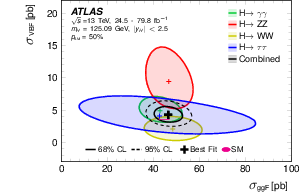

**Hypothesis Testing**

A *simple hypothesis* is one which is completely specified, whereas a *composite hypothesis* is one involving free parameters.

*What is the null hypothesis?* It is the default case that you are comparing to.

*Type 1 error*: rejecting the null hypothesis when it is true. The probability of doing this is $\alpha$.  Think of this as a false positive.

*Type 2 error*: accepting the null hypothesis when it is false. The probability of doing this is $\beta$.  Think of this as a false negative.

  The *level of significance* of a hypothesis test is $\alpha$.  There is a quantitative trade off between the Type 1 and Type 2 errors.  You can see that below by varying the parameters of the null ($H_0$) and alternative ($H_1$) hypothesis pdfs and seeing how the values of $\alpha$ and $\beta$ change.

In [ ]:
null_mean = 0
null_width = 1
test_mean = 3
test_width = 2.5

fig, ax = plt.subplots(2)
mean, var, skew, kurt = norm.stats(loc=-10,moments='mvsk')
x = np.linspace(norm.ppf(0.01,loc=null_mean,scale=null_width),norm.ppf(0.999,loc=test_mean,scale=test_width), 200)

ax[0].plot(x, norm.pdf(x,loc=null_mean, scale=null_width), 'r-', lw=5, alpha=0.6, label='null pdf')
ax[0].set_title("null hypothesis")
ax[1].plot(x, norm.pdf(x,loc=test_mean, scale=test_width), 'r-', lw=5, alpha=0.6, label='signal pdf')
ax[1].set_title("alternative hypothesis")

m_critical = 2.5 # value at which you descriminate...
#the critical value determines alpha & beta
alpha= 1 - norm.cdf(m_critical,loc=null_mean, scale=null_width)
print("alpha:", alpha)
beta = norm.cdf(m_critical,loc=test_mean, scale=test_width)
print("beta:",beta)

m_critical_min = -2
m_critical_max = 4
values = np.linspace(m_critical_min,m_critical_max,num=100)
arr = np.empty((0,2))
for mc in values:
  a1 = 1 - norm.cdf(mc,loc=null_mean, scale=null_width)
  b1 = norm.cdf(mc,loc=test_mean, scale=test_width)
  arr = np.append(arr,[[a1,b1]],axis=0)

fig1, a2d = plt.subplots(1)
a2d.plot(arr[:,0], arr[:,1], 'r-', lw=5, alpha=0.6, label='blah')
a2d.set_title("beta as a function of alpha")

The above assumes that the overall rate of the signal and background events are the same.  If the relative expected rate of background compared to signal, $R$, is small, then you might be able to accept a higher value of $\beta$ because it is suppressed by the overall value small rate of background events.